# Dissolved Barium transects and fluxes

In [1]:
import sys
sys.path.insert(0, '../../_libs/')
import NEMO_tools as Nts

In [2]:
import glob
import datetime
import scipy.io
import numpy as np
import seaborn as sb
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
ETOPO2_Arctic=scipy.io.loadmat('../../_libs/ETOPO2_Arctic.mat')
ETOPO2_CAA=scipy.io.loadmat('../../_libs/ETOPO2_CAA.mat')

#print(ETOPO2_Arctic)
lon_arctic=ETOPO2_Arctic['lon_arctic']
lat_arctic=ETOPO2_Arctic['lat_arctic']
topo_arctic=ETOPO2_Arctic['topo_arctic']

res_unit=3
lon_arctic=lon_arctic[0:-1:res_unit, 0:-1:res_unit]
lat_arctic=lat_arctic[0:-1:res_unit, 0:-1:res_unit]
topo_arctic=topo_arctic[0:-1:res_unit, 0:-1:res_unit]*-1 

In [4]:
def unique_continue(x):
    # Has the functionality of numpy.unique but work with "repeated and continued" elements    
    A = np.diff(x)
    head = [0]
    counts = []
    sub_counts = 1
    for i in range(len(A)):
        if A[i] == 0:
            sub_counts += 1
        else:
            counts.insert(len(counts), sub_counts)            
            sub_counts = 1
            head.insert(len(counts), i)
        # deal with the end of an array
        if i == len(A)-1:
            counts.insert(len(counts), sub_counts)            
            sub_counts = 1
            head.insert(len(counts), i)
            
    head_loc = np.array(head)    
    head_loc[1:]=head_loc[1:]+1
    return head_loc, np.array(counts)

In [5]:
FName = '/ocean/yingkai/GEOTRACES/Simulations/BARIUM01_1m_20020101_20140103_ptrc_T.nc'

In [6]:
ptrc_obj = nc.Dataset(FName)
nav_lat = ptrc_obj.variables['nav_lat'][:]
nav_lon = ptrc_obj.variables['nav_lon'][:]
deptht = ptrc_obj.variables['deptht'][:]

In [12]:
# lon/lat base info
xgrid = np.array([-0.5, -168.5])
ygrid = np.linspace(60, 90, 200)
lon, lat = np.meshgrid(xgrid, ygrid)
# transects by lon/lat
trans1 = np.vstack([lon[30:, 0], lat[30:, 0]]) # 30
trans2 = np.vstack([lon[20:, 1], lat[20:, 1]])
# project lon/lat into ANHA4 grid
indx1, indy1 = Nts.nearest_search(nav_lon, nav_lat, trans1[0, :], trans1[1, :])
indx2, indy2 = Nts.nearest_search(nav_lon, nav_lat, trans2[0, :], trans2[1, :])
indx3 = np.arange(indx1.max()+1, indx2.min(), 1)
indy3 = np.array([306, 306, 306, 305, 305, 305, 305, 305, 304, 304, 304])
indx_total = np.hstack([indx1, indx3, np.flipud(indx2)])
indy_total = np.hstack([indy1, indy3, np.flipud(indy2)])
# delete repeated elements
head_loc, counts_loc = unique_continue(indx_total*indy_total)
indx = indx_total[head_loc]
indy = indy_total[head_loc]

In [13]:
xgrid = np.array([-0.5, -145])
ygrid = np.linspace(67, 90, 200)
lon, lat = np.meshgrid(xgrid, ygrid)
# transects by lon/lat
transBG = np.vstack([lon[20:, 1], lat[20:, 1]])
indxBG_total, indyBG_total = Nts.nearest_search(nav_lon, nav_lat, transBG[0, :], transBG[1, :])
head_loc, counts_loc = unique_continue(indxBG_total*indyBG_total)
indxBG = indxBG_total[head_loc]
indyBG = indyBG_total[head_loc]

In [66]:
xgrid = np.linspace(-24, 22, 200)
ygrid = np.array([70, 70])
lon, lat = np.meshgrid(xgrid, ygrid)
# transects by lon/lat
transFS = np.vstack([lon[0, :], lat[0, :]])
indxFS_total, indyFS_total = Nts.nearest_search(nav_lon, nav_lat, transFS[0, :], transFS[1, :])
head_loc, counts_loc = unique_continue(indxFS_total*indyFS_total)
indxFS = indxFS_total[head_loc]
indyFS = indyFS_total[head_loc]

In [72]:
xgrid = np.linspace(-70, -50, 200)
ygrid = np.array([66, 66])
lon, lat = np.meshgrid(xgrid, ygrid)
# transects by lon/lat
transBB = np.vstack([lon[0, :], lat[0, :]])
indxBB_total, indyBB_total = Nts.nearest_search(nav_lon, nav_lat, transBB[0, :], transBB[1, :])
head_loc, counts_loc = unique_continue(indxBB_total*indyBB_total)
indxBB = indxBB_total[head_loc]
indyBB = indyBB_total[head_loc]

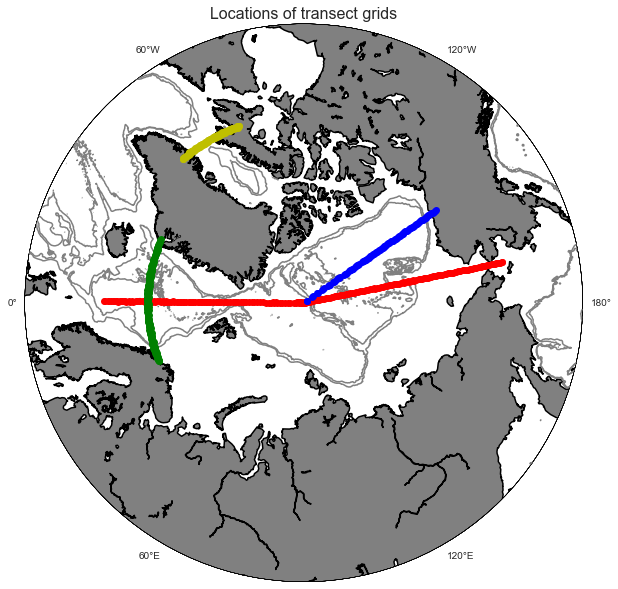

In [110]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
topox, topoy=proj(lon_arctic, lat_arctic)
proj.contour(topox, topoy, topo_arctic, [1000, 2000], colors=('gray',), linewidths=1.5)
proj.plot(x[indx, indy], y[indx, indy], 'ro')
proj.plot(x[indxBG, indyBG], y[indxBG, indyBG], 'bo')
proj.plot(x[indxFS, indyFS], y[indxFS, indyFS], 'go')
proj.plot(x[indxBB, indyBB], y[indxBB, indyBB], 'yo')
#proj.plot(x, y, lw=0.25); proj.plot(x.T, y.T, lw=0.25);
ax.set_title('Locations of transect grids', fontsize=16)

In [78]:
#Ba_trans = np.zeros([144, 50, len(indx)])
#Ba_transBG = np.zeros([144, 50, len(indxBG)])
#Ba_transFS = np.zeros([144, 50, len(indxFS)])
#Ba_transBB = np.zeros([144, 50, len(indxBB)])
#
#for j in range(144):
#    print('time: {}'.format(j))
#    for i in range(len(indx)):
#        Ba_trans[j, :, i] = ptrc_obj.variables['Ba'][j, :, indx[i], indy[i]]
#    for i in range(len(indxBG)):
#        Ba_transBG[j, :, i] = ptrc_obj.variables['Ba'][j, :, indxBG[i], indyBG[i]]
#    for i in range(len(indxFS)):
#        Ba_transFS[j, :, i] = ptrc_obj.variables['Ba'][j, :, indxFS[i], indyFS[i]]
#    for i in range(len(indxBB)):
#        Ba_transBB[j, :, i] = ptrc_obj.variables['Ba'][j, :, indxBB[i], indyBB[i]]

In [75]:
fake_x = np.arange(len(indx))
fake_xgrid, dgrid = np.meshgrid(fake_x, deptht)
fake_xBG = np.arange(len(indxBG))
fake_xgridBG, dgridBG = np.meshgrid(fake_xBG, deptht)
fake_xFS = np.arange(len(indxFS))
fake_xgridFS, dgridFS = np.meshgrid(fake_xFS, deptht)
fake_xBB = np.arange(len(indxBB))
fake_xgridBB, dgridBB = np.meshgrid(fake_xBB, deptht)

In [80]:
save_var = {'Ba_trans':Ba_trans, 'dgrid':dgrid, 'fake_xgrid':fake_xgrid,
            'Ba_transBG':Ba_transBG, 'dgridBG':dgridBG, 'fake_xgridBG':fake_xgridBG,
            'Ba_transFS':Ba_transFS, 'dgridFS':dgridFS, 'fake_xgridFS':fake_xgridFS,
            'Ba_transBB':Ba_transBB, 'dgridBB':dgridBB, 'fake_xgridBB':fake_xgridBB,           
           }
scipy.io.savemat('../../_data/Exchange/Ba_trans.mat', mdict=save_var)

In [41]:
#save_var = {'Ba_transBG':Ba_transBG, 'dgridBG':dgridBG, 'fake_xgridBG':fake_xgridBG}
#scipy.io.savemat('../../_data/Exchange/Ba_transBG.mat', mdict=save_var)

In [81]:
MAT = scipy.io.loadmat('../../_data/Exchange/Ba_trans.mat')

Ba_trans = MAT['Ba_trans']
dgrid = MAT['dgrid']
fake_xgrid = MAT['fake_xgrid']

Ba_transBG = MAT['Ba_transBG']
dgridBG = MAT['dgridBG']
fake_xgridBG = MAT['fake_xgridBG']

Ba_transFS = MAT['Ba_transFS']
dgridFS = MAT['dgridFS']
fake_xgridFS = MAT['fake_xgridFS']

Ba_transBB = MAT['Ba_transBB']
dgridBB = MAT['dgridBB']
fake_xgridBB = MAT['fake_xgridBB']

In [83]:
Ba_trans_mask = np.ma.array(Ba_trans, mask=(Ba_trans==0))
Ba_trans_mean = np.nanmean(Ba_trans_mask, 0)
Ba_grad_mean, _ = np.gradient(Ba_trans_mean)

Ba_trans_2008 = np.nanmean(Ba_trans_mask[74:76], 0)
Ba_grad_2008, _ = np.gradient(Ba_trans_2008)

In [84]:
Ba_transBG_mask = np.ma.array(Ba_transBG, mask=(Ba_transBG==0))
Ba_transBG_mean = np.nanmean(Ba_transBG_mask, 0)
Ba_gradBG_mean, _ = np.gradient(Ba_transBG_mean)

Ba_transBG_2008 = np.nanmean(Ba_transBG_mask[74:76], 0)
Ba_gradBG_2008, _ = np.gradient(Ba_transBG_2008)

In [82]:
Ba_transFS_mask = np.ma.array(Ba_transFS, mask=(Ba_transFS==0))
Ba_transFS_mean = np.nanmean(Ba_transFS_mask, 0)
Ba_gradFS_mean, _ = np.gradient(Ba_transFS_mean)

In [85]:
Ba_transBB_mask = np.ma.array(Ba_transBB, mask=(Ba_transBB==0))
Ba_transBB_mean = np.nanmean(Ba_transBB_mask, 0)
Ba_gradBB_mean, _ = np.gradient(Ba_transBB_mean)

In [87]:
lev1 = np.arange(40, 80, 2)
lev2 = np.arange(36, 76, 2)
lev_grad = np.arange(-6, 7, 1)
sb.set_style('white')

# 2002 - 2013 Climatology

## Fram Strait - Bering Strait & Beaufort Gyre

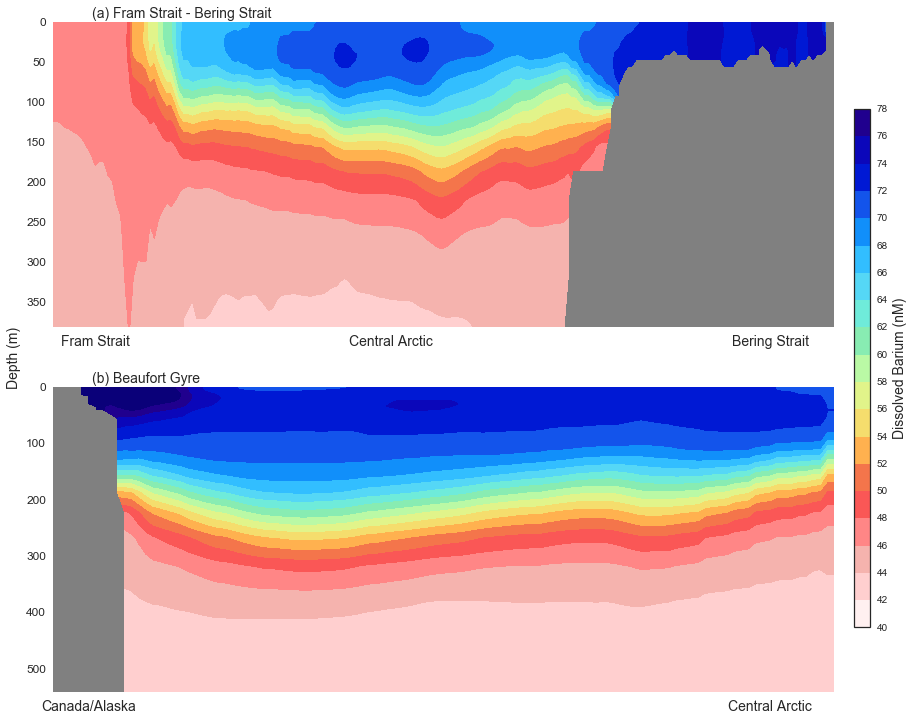

In [53]:
fig = plt.figure(figsize=(14, 12))

ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
AX = [ax1, ax2]
for i in range(2):
    AX[i].grid(False)
    AX[i].spines["top"].set_visible(False)
    AX[i].spines["bottom"].set_visible(False) 
    AX[i].spines["right"].set_visible(False)
    AX[i].spines["left"].set_visible(False)
    AX[i].patch.set_color('.5')
    AX[i].invert_yaxis()
    AX[i].yaxis.set_tick_params(labelsize=12)

ax1.set_ylabel('Depth (m)', fontsize=14, y=-0.1)
ax1.set_xticklabels(['Fram Strait', 'Central Arctic', 'Bering Strait'], fontsize=14); ax1.set_xticks([60, 130, 220])
ax1.set_title('(a) Fram Strait - Bering Strait', loc='left', x=0.05, fontsize=14)

ax2.set_xticklabels(['Canada/Alaska', 'Central Arctic'], fontsize=14); ax2.set_xticks([5, 100])
ax2.set_title('(b) Beaufort Gyre', loc='left', x=0.05, fontsize=14)

CS1 = ax1.contourf(fake_xgrid[:30, 50:], dgrid[:30, 50:], Ba_trans_mean[:30, 50:], lev1, cmap=cm.GMT_haxby_r)
CS2 = ax2.contourf(fake_xgridBG[:32, :], dgridBG[:32, :], Ba_transBG_mean[:32, :], lev1, cmap=cm.GMT_haxby_r)

#CS1 = ax1.pcolor(fake_xgrid[:30, 50:], dgrid[:30, 50:], Ba_trans_mean[:30, 50:], vmin=lev1[0], vmax=lev1[-1], cmap=cm.GMT_haxby_r)
#CS2 = ax2.pcolor(fake_xgridBG[:35, :], dgridBG[:35, :], Ba_transBG_mean[:35, :], vmin=lev1[0], vmax=lev1[-1], cmap=cm.GMT_haxby_r)

cax  = fig.add_axes([0.92, 0.2, 0.015, 0.6])
CBar = fig.colorbar(CS1, cax=cax, orientation='vertical')
CBar.set_label('Dissolved Barium (nM)', fontsize=14)
CBar.ax.tick_params(axis='y', length=0)
CBar.set_ticks(lev1)

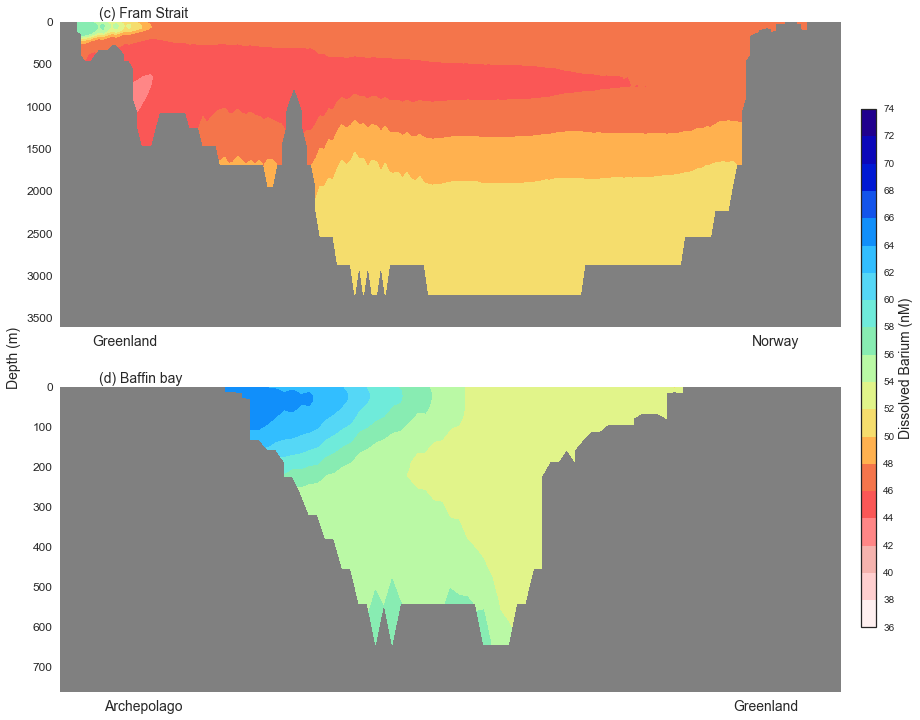

In [108]:
fig = plt.figure(figsize=(14, 12))

ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
AX = [ax1, ax2]
for i in range(2):
    AX[i].grid(False)
    AX[i].spines["top"].set_visible(False)
    AX[i].spines["bottom"].set_visible(False) 
    AX[i].spines["right"].set_visible(False)
    AX[i].spines["left"].set_visible(False)
    AX[i].patch.set_color('.5')
    AX[i].invert_yaxis()
    AX[i].yaxis.set_tick_params(labelsize=12)

ax1.set_ylabel('Depth (m)', fontsize=14, y=-0.1)
ax1.set_xticklabels(['Greenland', 'Norway'], fontsize=14); ax1.set_xticks([15, 165])
ax1.set_title('(c) Fram Strait', loc='left', x=0.05, fontsize=14)

ax2.set_xticklabels(['Archepolago', 'Greenland'], fontsize=14); ax2.set_xticks([40, 115])
ax2.set_title('(d) Baffin bay', loc='left', x=0.05, fontsize=14)

CS1 = ax1.contourf(fake_xgridFS[:45, :], dgridFS[:45, :], Ba_transFS_mean[:45, :], lev2, cmap=cm.GMT_haxby_r)
CS2 = ax2.contourf(fake_xgridBB[:34, 30:], dgridBB[:34, 30:], Ba_transBB_mean[:34, 30:], lev2, cmap=cm.GMT_haxby_r)

#CS1 = ax1.pcolor(fake_xgrid[:30, 50:], dgrid[:30, 50:], Ba_trans_mean[:30, 50:], vmin=lev1[0], vmax=lev1[-1], cmap=cm.GMT_haxby_r)
#CS2 = ax2.pcolor(fake_xgridBG[:35, :], dgridBG[:35, :], Ba_transBG_mean[:35, :], vmin=lev1[0], vmax=lev1[-1], cmap=cm.GMT_haxby_r)

cax  = fig.add_axes([0.92, 0.2, 0.015, 0.6])
CBar = fig.colorbar(CS1, cax=cax, orientation='vertical')
CBar.set_label('Dissolved Barium (nM)', fontsize=14)
CBar.ax.tick_params(axis='y', length=0)
CBar.set_ticks(lev2)

## Gradient

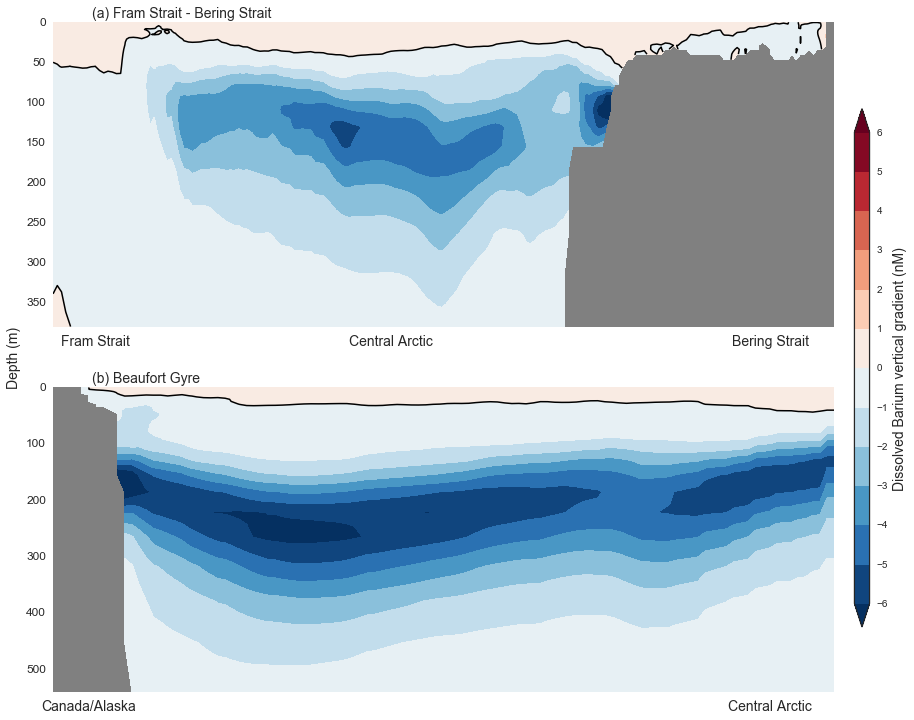

In [49]:
fig = plt.figure(figsize=(14, 12))

ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
AX = [ax1, ax2]
for i in range(2):
    AX[i].grid(False)
    AX[i].spines["top"].set_visible(False)
    AX[i].spines["bottom"].set_visible(False) 
    AX[i].spines["right"].set_visible(False)
    AX[i].spines["left"].set_visible(False)
    AX[i].patch.set_color('.5')
    AX[i].invert_yaxis()
    AX[i].yaxis.set_tick_params(labelsize=12)

ax1.set_ylabel('Depth (m)', fontsize=14, y=-0.1)
ax1.set_xticklabels(['Fram Strait', 'Central Arctic', 'Bering Strait'], fontsize=14); ax1.set_xticks([60, 130, 220])
ax1.set_title('(a) Fram Strait - Bering Strait', loc='left', x=0.05, fontsize=14)

ax2.set_xticklabels(['Canada/Alaska', 'Central Arctic'], fontsize=14); ax2.set_xticks([5, 100])
ax2.set_title('(b) Beaufort Gyre', loc='left', x=0.05, fontsize=14)

CS1 = ax1.contourf(fake_xgrid[:30, 50:], dgrid[:30, 50:], Ba_grad_mean[:30, 50:], lev_grad, cmap=plt.cm.RdBu_r, extend='both')
CS2 = ax2.contourf(fake_xgridBG[:32, :], dgridBG[:32, :], Ba_gradBG_mean[:32, :], lev_grad, cmap=plt.cm.RdBu_r, extend='both')
#CS1 = ax1.pcolor(fake_xgrid[:30, 50:], dgrid[:30, 50:], Ba_grad_mean[:30, 50:], vmin=lev_grad[0], vmax=lev_grad[-1], cmap=plt.cm.RdBu_r)
ax1.contour(fake_xgrid[:30, 50:], dgrid[:30, 50:], Ba_grad_mean[:30, 50:], [0], colors=('k',), linewidths=1.5)
#CS2 = ax2.pcolor(fake_xgridBG[:32, :], dgridBG[:32, :], Ba_gradBG_mean[:32, :], vmin=lev_grad[0], vmax=lev_grad[-1], cmap=plt.cm.RdBu_r)
ax2.contour(fake_xgridBG[:30, :], dgridBG[:30, :], Ba_gradBG_mean[:30, :], [0], colors=('k',), linewidths=1.5)

cax  = fig.add_axes([0.92, 0.2, 0.015, 0.6])
CBar = fig.colorbar(CS1, cax=cax, orientation='vertical')
CBar.set_label('Dissolved Barium vertical gradient (nM)', fontsize=14)
CBar.ax.tick_params(axis='y', length=0)
CBar.set_ticks(lev_grad)

# Tracer flux cross

$$
F_T = T\iint_S{(n\times \vec{v})\ dxdy} = \sum_{i=0}^n{T_iv_i\Delta x\Delta z}
$$

In [109]:
coordinate_name=glob.glob('../../_data/Exchange/coordinates_ANHA4.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]
e1t = coordinate_obj.variables['e1t'][:]
e2t = coordinate_obj.variables['e2t'][:]

# The case in Mar-Apr 2008 

## Gradient

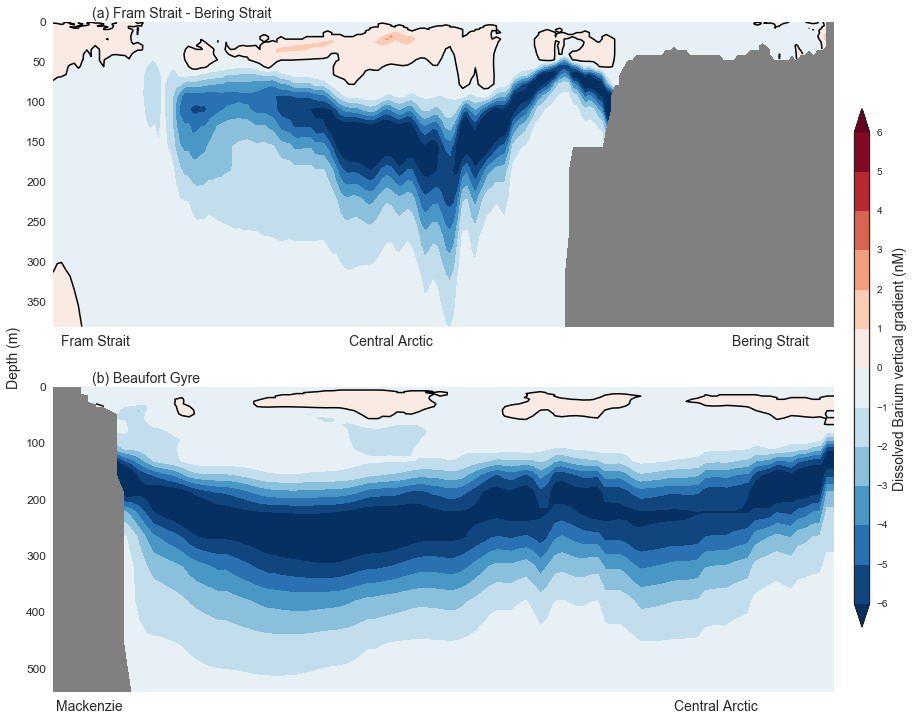

In [38]:
fig = plt.figure(figsize=(14, 12))

ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
AX = [ax1, ax2]
for i in range(2):
    AX[i].grid(False)
    AX[i].spines["top"].set_visible(False)
    AX[i].spines["bottom"].set_visible(False) 
    AX[i].spines["right"].set_visible(False)
    AX[i].spines["left"].set_visible(False)
    AX[i].patch.set_color('.5')
    AX[i].invert_yaxis()
    AX[i].yaxis.set_tick_params(labelsize=12)

ax1.set_ylabel('Depth (m)', fontsize=14, y=-0.1)
ax1.set_xticklabels(['Fram Strait', 'Central Arctic', 'Bering Strait'], fontsize=14); ax1.set_xticks([60, 130, 220])
ax1.set_title('(a) Fram Strait - Bering Strait', loc='left', x=0.05, fontsize=14)

ax2.set_xticklabels(['Mackenzie', 'Central Arctic'], fontsize=14); ax2.set_xticks([5, 92.5])
ax2.set_title('(b) Beaufort Gyre', loc='left', x=0.05, fontsize=14)

CS1 = ax1.contourf(fake_xgrid[:30, 50:], dgrid[:30, 50:], Ba_grad_2008[:30, 50:], lev_grad, cmap=plt.cm.RdBu_r, extend='both')
ax1.contour(fake_xgrid[:30, 50:], dgrid[:30, 50:], Ba_grad_2008[:30, 50:], [0], colors=('k',), linewidths=1.5)
CS2 = ax2.contourf(fake_xgridBG[:32, :], dgridBG[:32, :], Ba_gradBG_2008[:32, :], lev_grad, cmap=plt.cm.RdBu_r, extend='both')
ax2.contour(fake_xgridBG[:30, :], dgridBG[:30, :], Ba_gradBG_2008[:30, :], [0], colors=('k',), linewidths=1.5)

cax  = fig.add_axes([0.92, 0.2, 0.015, 0.6])
CBar = fig.colorbar(CS1, cax=cax, orientation='vertical')
CBar.set_label('Dissolved Barium vertical gradient (nM)', fontsize=14)
CBar.ax.tick_params(axis='y', length=0)
CBar.set_ticks(lev_grad)

In [51]:
deptht[19]

65.807274